# Load IMERG data

rebuilding: [source](https://gpm-api.readthedocs.io/en/latest/tutorials/tutorial_02_IMERG.html)

In [2]:
import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import ximage  # noqa

import gpm
from gpm.utils.geospatial import (
    get_circle_coordinates_around_point,
    get_country_extent,
)

## 1. Download data

In [3]:
# Specify the time period you are interested in
start_time = datetime.datetime.strptime("2014-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2014-05-02 00:00:00", "%Y-%m-%d %H:%M:%S")

# Specify the product and product type
product = "IMERG-FR"  # FR = final run
product_type = "RS"  # "NRT"
storage = "GES_DISC"  # or PPS, but I used the NASA Earthdata login information
# Specify the version
version = 7

In [4]:
# Download the data
gpm.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    storage=storage,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)


All the available GPM IMERG-FR product files are already on disk.


In [5]:
# Load IMERG dataset
ds = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
)
ds



/Users/johanna/opt/anaconda3/envs/esdp/lib/python3.12/site-packages/gpm/dataset/dataset.py:296: GPM_Warning: 'Missing timesteps across the dataset !'
  ds = finalize_dataset(
/Users/johanna/opt/anaconda3/envs/esdp/lib/python3.12/site-packages/gpm/dataset/dataset.py:309: GPM_Warning: 'The GPM Dataset has missing granules !'
  warnings.warn(msg, GPM_Warning, stacklevel=1)


<xarray.Dataset> Size: 25GB
Dimensions:                         (time: 96, lat: 1800, lon: 3600, lonv: 2,
                                     latv: 2, nv: 2)
Coordinates:
  * time                            (time) datetime64[ns] 768B 2014-05-01T00:...
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
    lon_bnds                        (lonv, lon) float32 29kB dask.array<chunksize=(2, 3600), meta=np.ndarray>
    lat_bnds                        (latv, lat) float32 14kB dask.array<chunksize=(2, 1800), meta=np.ndarray>
    time_bnds                       (time, nv) datetime64[ns] 2kB 2014-05-01 ...
    crsWGS84                        int64 8B 0
Dimensions without coordinates: lonv, latv, nv
Data variables:
    precipitation                   (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationQualityIndex       (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    MWprecipitation                 (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    MWprecipSource                  (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    MWobservationTime               (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRprecipitation                 (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRinfluence                     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationUncal              (time, lat, lon) float32 2GB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20140501-S000000-E002959.0000.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/07
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_7.0
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  7e
    MetadataVersion:    7e
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2026-01-28 06:5...
    gpm_api_product:    IMERG-FR

In [6]:
# Available variables
variables = list(ds.data_vars)
print("Available variables: ", variables)
# Available coordinates
coords = list(ds.coords)
print("Available coordinates: ", coords)
# Available dimensions
dims = list(ds.dims)
print("Available dimensions: ", dims)

Available variables:  ['precipitation', 'randomError', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex', 'MWprecipitation', 'MWprecipSource', 'MWobservationTime', 'IRprecipitation', 'IRinfluence', 'precipitationUncal']
Available coordinates:  ['lon_bnds', 'lat_bnds', 'lon', 'lat', 'time_bnds', 'time', 'crsWGS84']
Available dimensions:  ['time', 'lat', 'lon', 'lonv', 'latv', 'nv']


In [7]:
variable = "precipitation"
da = ds[variable]
print("Data type of numerical array: ", type(da.data))
da

Data type of numerical array:  <class 'dask.array.core.Array'>


<xarray.DataArray 'precipitation' (time: 96, lat: 1800, lon: 3600)> Size: 2GB
dask.array<transpose, shape=(96, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 768B 2014-05-01T00:30:00 ... 2014-05-02
  * lat       (lat) float32 7kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon       (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
    crsWGS84  int64 8B 0
Attributes:
    units:            mm/hr
    description:      Complete merged microwave-infrared (gauge-adjusted) pre...
    gpm_api_product:  IMERG-FR
    valid_min:        0
    valid_max:        1000
    gpm_api_decoded:  yes
    grid_mapping:     crsWGS84

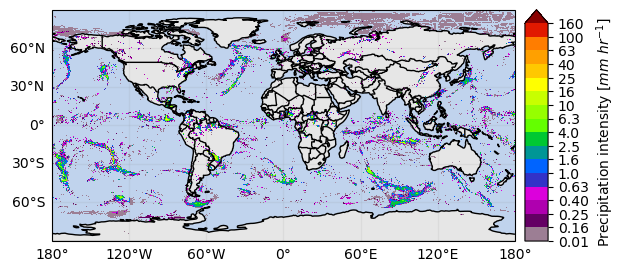

In [8]:
ds['precipitation'].isel(time=0).gpm.plot_map()  # With cartopy

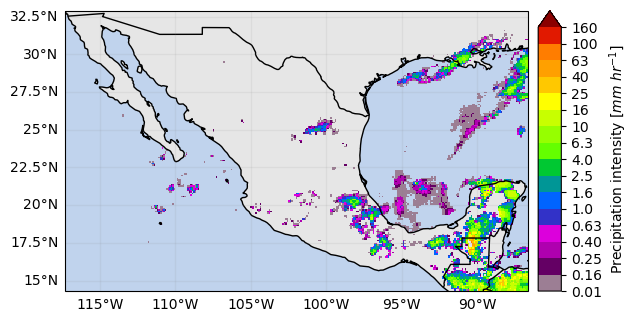

In [9]:
# Crop by country name
ds_mexico = ds.gpm.crop_by_country("Mexico")
ds_mexico["precipitation"].isel(time=0).gpm.plot_map()

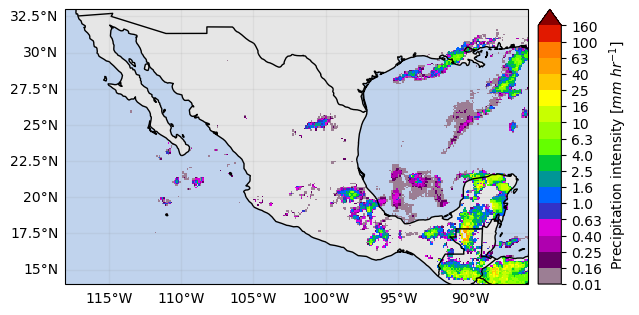

In [ ]:
# Define your region (latitude/longitude bounds)
lat_min, lat_max = 14.0, 33.0  
lon_min, lon_max = -118.0, -86.0

# Select the region
ds_region = ds.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)

# Plot the region

ds_region['precipitation'].isel(time=0).gpm.plot_map()

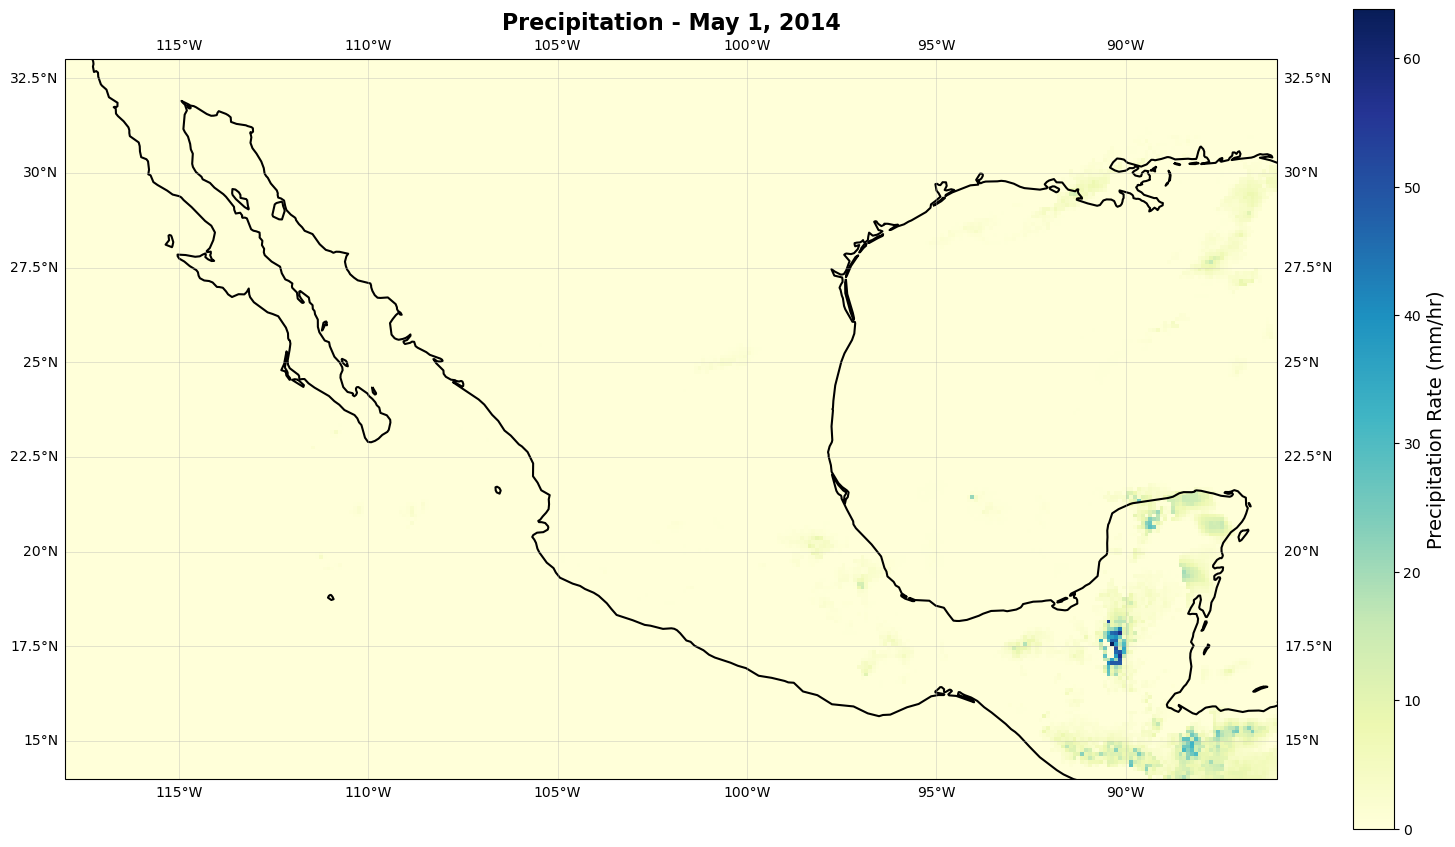

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create figure with custom size
fig, ax = plt.subplots(
    figsize=(16, 12),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Plot the data
im = ds_region['precipitation'].isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='YlGnBu',
    #vmin=0,
    #vmax=10,
    add_colorbar=False
)

# Add colorbar with custom label
cbar = plt.colorbar(im, ax=ax, pad=0.05, shrink=0.7)
cbar.set_label('Precipitation Rate (mm/hr)', fontsize=14)

# Add map features
ax.coastlines(linewidth=1.5)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)

# Custom title
ax.set_title('Precipitation - May 1, 2014', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()